In [38]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df = pd.read_csv("seatdata.csv")
df.head()

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX
0,1740,931,0.535057,18.397410,-55,685,55.7,320.008170
1,1877,870,0.463506,22.593552,95,685,79.6,620.317771
2,1764,962,0.545351,22.881413,20,635,71.2,606.858170
3,1686,906,0.537367,29.444916,-55,685,83.7,660.937775
4,1786,933,0.522396,22.760076,95,685,72.6,615.836151


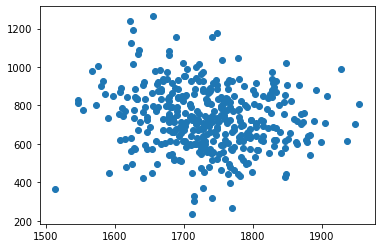

In [2]:
plt.scatter(df["Stature"], df["SeatX"])

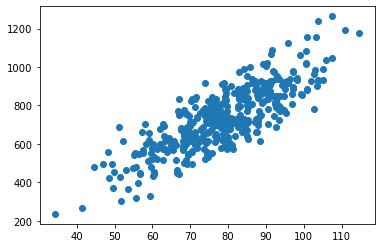

In [3]:
plt.scatter(df["Weight"], df["SeatX"])

In [4]:
weight_mean = np.mean(df["Weight"])
seatx_mean = np.mean(df["SeatX"])
mean = (weight_mean, seatx_mean)[0]
mean

78.29598997493731

In [5]:
seatx_std = np.std(df["SeatX"])
weight_std = np.std(df["Weight"])
std = (weight_std, seatx_std)
std

(13.263953600744635, 163.25454210363296)

In [6]:
df_new=df[["Weight","SeatX"]]
df_new.agg([np.std,np.mean])

,Weight,SeatX
std,13.280606,163.459507
mean,78.295990,734.188688


In [7]:
df[["Weight","SeatX"]].agg([np.std,np.mean])

,Weight,SeatX
std,13.280606,163.459507
mean,78.295990,734.188688


In [8]:
df.loc[(df["Weight"] < 50) & (df["SeatX"] < 400), ["Weight", "SeatX"]]

obs1 = df.loc[222, ["Weight", "SeatX"]].values
obs2 = df.loc[343, ["Weight", "SeatX"]].values
mean = np.array(mean)
distance1 = np.sqrt(np.sum((mean - obs1) ** 2))
std = np.array(std)
std_norm = np.sqrt(np.sum(std ** 2))
3 * std_norm < distance1

False

# Z Score

In [17]:
df['zscore']=(df["Weight"]-df["Weight"].mean())/df["Weight"].std()

In [18]:
threshold=3
outlier = df[(df['zscore']<-(threshold))|(df['zscore']>threshold)]

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX,zscore
222,1712,915,0.534463,11.668596,20,635,34.2,236.141543,-3.32033


In [20]:
df_no_outlier=df[(df['zscore'] > -(threshold)) & (df['zscore'] < threshold)]
df_no_outlier

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX,zscore
0,1740,931,0.535057,18.397410,-55,685,55.7,320.008170,-1.701428
1,1877,870,0.463506,22.593552,95,685,79.6,620.317771,0.098189
2,1764,962,0.545351,22.881413,20,635,71.2,606.858170,-0.534312
3,1686,906,0.537367,29.444916,-55,685,83.7,660.937775,0.406910
4,1786,933,0.522396,22.760076,95,685,72.6,615.836151,-0.428895
...,...,...,...,...,...,...,...,...,...
394,1626,979,0.602091,38.012373,20,635,100.5,1015.796173,1.671912
395,1736,892,0.513825,30.626845,-55,685,92.3,814.620340,1.054471
396,1870,892,0.477005,25.880065,95,685,90.5,705.289026,0.918935
397,1717,865,0.503786,21.064493,20,635,62.1,599.792224,-1.219522


In [21]:
df.shape[0]-df_no_outlier.shape[0]

1

In [23]:
df.shape

(399, 9)

In [24]:
df_no_outlier.shape

(398, 9)

# IQR

In [28]:
Q1 = df ['Weight'] . quantile (0.25)
Q3 = df ['Weight'] . quantile (0.75)
IQR = Q3 - Q1
lower_limit = Q1 - 1.5 * IQR
upper_limit = Q3 + 1.5 * IQR

In [29]:
outlier = df[(df ['Weight'] < lower_limit) | (df ['Weight'] > upper_limit)]
outlier

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX,zscore
222,1712,915,0.534463,11.668596,20,635,34.2,236.141543,-3.320330
343,1770,873,0.493220,13.214594,-55,685,41.4,267.703836,-2.778186


In [30]:
df_no_outlier = df[(df ['Weight'] > lower_limit) & (df ['Weight'] < upper_limit)]
df_no_outlier

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX,zscore
0,1740,931,0.535057,18.397410,-55,685,55.7,320.008170,-1.701428
1,1877,870,0.463506,22.593552,95,685,79.6,620.317771,0.098189
2,1764,962,0.545351,22.881413,20,635,71.2,606.858170,-0.534312
3,1686,906,0.537367,29.444916,-55,685,83.7,660.937775,0.406910
4,1786,933,0.522396,22.760076,95,685,72.6,615.836151,-0.428895
...,...,...,...,...,...,...,...,...,...
394,1626,979,0.602091,38.012373,20,635,100.5,1015.796173,1.671912
395,1736,892,0.513825,30.626845,-55,685,92.3,814.620340,1.054471
396,1870,892,0.477005,25.880065,95,685,90.5,705.289026,0.918935
397,1717,865,0.503786,21.064493,20,635,62.1,599.792224,-1.219522


In [31]:
df.shape[0]-df_no_outlier.shape[0]

2

# mu < 3 sigma

In [40]:
lower_limit = (df['Weight'].mean()) - (3 * df['Weight'].std())
upper_limit = (df['Weight'].mean()) + (3 * df['Weight'].std())

In [41]:
outlier = df[(df ['Weight'] < lower_limit) | (df ['Weight'] > upper_limit)]
outlier

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX
222,1712,915,0.534463,11.668596,20,635,34.2,236.141543


In [42]:
df_no_outlier = df[(df ['Weight'] > lower_limit) & (df ['Weight'] < upper_limit)]
df_no_outlier

,Stature,Sitting Height,SHS,BMI,L11,H17,Weight,SeatX
0,1740,931,0.535057,18.397410,-55,685,55.7,320.008170
1,1877,870,0.463506,22.593552,95,685,79.6,620.317771
2,1764,962,0.545351,22.881413,20,635,71.2,606.858170
3,1686,906,0.537367,29.444916,-55,685,83.7,660.937775
4,1786,933,0.522396,22.760076,95,685,72.6,615.836151
...,...,...,...,...,...,...,...,...
394,1626,979,0.602091,38.012373,20,635,100.5,1015.796173
395,1736,892,0.513825,30.626845,-55,685,92.3,814.620340
396,1870,892,0.477005,25.880065,95,685,90.5,705.289026
397,1717,865,0.503786,21.064493,20,635,62.1,599.792224
